In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *

import random

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My\ Drive/Digikala/Digikala2/Report2/Armita\ Razavi

/content/gdrive/My Drive/Digikala/Digikala2/Report2/Armita Razavi


In [0]:
df = pd.read_csv('Copy_of_classified_3.csv')

In [0]:
sampleStr = " سلام دوستان هدست توجه قیمتش فوق العادست درضمن حدود دوسال نیم هست که۵عددش رو خریدیم یکیش خراب"
print("Original String: ", sampleStr)
# convert string into list
char_list = sampleStr.split()
print("Listl String: ", char_list)
# shuffle list
random.shuffle(char_list)
# convert list to string
finalStr = ' '.join(char_list)
print("shuffled String is: ", finalStr)

Original String:   سلام دوستان هدست توجه قیمتش فوق العادست درضمن حدود دوسال نیم هست که۵عددش رو خریدیم یکیش خراب
Listl String:  ['سلام', 'دوستان', 'هدست', 'توجه', 'قیمتش', 'فوق', 'العادست', 'درضمن', 'حدود', 'دوسال', 'نیم', 'هست', 'که۵عددش', 'رو', 'خریدیم', 'یکیش', 'خراب']
shuffled String is:  رو هست دوستان نیم هدست سلام یکیش که۵عددش حدود توجه العادست دوسال خریدیم فوق خراب قیمتش درضمن


In [0]:
#Messed up comments and make them meaningless
def shuffle_text(text):
    # print("Original String: ", str(text))
    # convert string into list
    char_list = str(text).split()
    # shuffle list
    random.shuffle(char_list)
    # convert list to string
    messyStr = ' '.join(char_list)
    # print("shuffled String is: ", messyStr)
    return messyStr

In [0]:
df['messy-comment'] = df['comment'].apply(shuffle_text)

In [0]:
def add_start_end(text):
    se_text = 'start ' + str(text) + ' end'
    return se_text

In [0]:
df['comment'] = df['comment'].apply(add_start_end)
df['messy-comment'] = df['messy-comment'].apply(add_start_end)

In [0]:
#Disply full value in columns
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [0]:
df['comment'].head(10)

0    <start> گیره های فلزی خیلی سخت میشوند لذا حوله خیلی سخت می توان آورد مهسان یه مدل دیگه داره پلاستیکی هست خیلی ساده راحت خم نظرم تولید طرح متوقف کنن چون گیره های آهنی خیلی سفت هستن وقتی می خواستم خمشون کنم پایه پلاستیکیش شکست بلا استفاده <end>                                                                                                                                                                                  
1    <start> متاسفانه عمر مفید ماشین کم هست بعد سال دیگه باطری کار نمیکنه گیر میکنه نحوی هیچیک دکمه ها کار نمیکنه چند ساعت حالت میمونه دوباره اتصال برق کار میکنه <end>                                                                                                                                                                                                                                                                  
2    <start> خوب بودممنون <end>                                                                                                                     

In [0]:
df['messy-comment'].head(10)

0    <start> خیلی چون سفت خیلی مهسان مدل متوقف خمشون دیگه پلاستیکیش حوله می پایه میشوند خم طرح های سخت فلزی راحت خیلی گیره کنم لذا گیره توان ساده آورد هستن پلاستیکی داره خواستم سخت وقتی های آهنی هست می استفاده شکست نظرم کنن یه تولید بلا خیلی <end>                                                                                                                                                                                  
1    <start> حالت متاسفانه اتصال دوباره کار نمیکنه سال ها بعد مفید گیر کار میکنه هیچیک ساعت عمر میکنه برق دیگه کم دکمه میمونه نمیکنه هست نحوی ماشین کار باطری چند <end>                                                                                                                                                                                                                                                                  
2    <start> خوب بودممنون <end>                                                                                                                     

In [0]:
X = df['messy-comment']
y = df['comment']

In [0]:
max_length = 30
trunc_type='post'

In [12]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer_X = Tokenizer()
tokenizer_X.fit_on_texts(X)
tokenizer_y = Tokenizer()
tokenizer_y.fit_on_texts(y)

X_sequences = tokenizer_X.texts_to_sequences(X)
y_sequences = tokenizer_y.texts_to_sequences(y)

Using TensorFlow backend.


In [0]:
# get only the top frequent words on train
X_data = pad_sequences(X_sequences, padding = "post", maxlen = max_length)
# get only the top frequent words on test
y_data = pad_sequences(y_sequences, padding = "post", maxlen = max_length)

In [0]:
print(X_data.shape, y_data.shape)

(118716, 30) (118716, 30)


In [0]:
# Split train data into train and validation
train_x, valid_x, train_y, valid_y = train_test_split(X_data, y_data, test_size=0.2)

In [0]:
train_labels = train_y
valid_labels = valid_y

In [0]:
print(train_x.shape)
print(valid_x.shape)
print(train_y.shape)
print(valid_y.shape)

(94972, 30)
(23744, 30)
(94972, 30)
(23744, 30)


In [0]:
print(train_x[19])
print()
print(train_y[19])

[  513   286   432    86   240   358   352     9    35    56   325    36
   434   498   771   447    35    41   680    16   379 32776   814    90
  1818    58  1839    41    36     2]

[  36  532   58  130  434  440  473  358  771   31   28  654 1004  189
  513 1839 1818   35   36  587  838  325  292 2424   41   56    9 2887
 2014    2]


In [0]:
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.index_word[t]))

In [0]:
print ("Input Language; index to word mapping")
convert(tokenizer_X, train_x[0])
print ()
print ("Target Language; index to word mapping")
convert(tokenizer_y, train_y[0])

Input Language; index to word mapping
1 ----> start
21 ----> می
1440 ----> مات
31 ----> بعد
67 ----> چند
281 ----> نخرید
92 ----> روز
333 ----> شه
124 ----> بد
2 ----> end

Target Language; index to word mapping
1 ----> start
124 ----> بد
281 ----> نخرید
31 ----> بعد
67 ----> چند
92 ----> روز
1440 ----> مات
21 ----> می
333 ----> شه
2 ----> end


In [0]:
import tensorflow as tf
#set Hyper Parameters
BUFFER_SIZE = len(train_x)
BATCH_SIZE = 64
steps_per_epoch = len(train_x)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = 53019
vocab_tar_size = 53019

dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [18]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 30]), TensorShape([64, 30]))

In [0]:
#define Encoder
class Encoder(Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding =Embedding(vocab_size, embedding_dim)
    self.gru = GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [20]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 30, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


In [0]:
#define Attention Layer
class BahdanauAttention(Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1)

  def call(self, query, values):
    # hidden shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # we are doing this to perform addition to calculate the score
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [22]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 30, 1)


In [0]:
#define decoder
class Decoder(Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = Embedding(vocab_size, embedding_dim)
    self.gru = GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [24]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 53019)


In [0]:
import os
import io
import time

In [0]:
#Define the optimizer and the loss function
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [0]:
#Checkpoints 
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

###Training
Pass the input through the encoder which return encoder output and the encoder 
hidden state.

The encoder output, encoder hidden state and the decoder input (which is the start token) is passed to the decoder.

The decoder returns the predictions and the decoder hidden state.

The decoder hidden state is then passed back into the model and the predictions are used to calculate the loss.

Use teacher forcing to decide the next input to the decoder.

Teacher forcing is the technique where the target word is passed as the next input to the decoder.

The final step is to calculate the gradients and apply it to the optimizer and backpropagate.

In [0]:
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([tokenizer_y.word_index['start']]  * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [29]:
EPOCHS = 2

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 200 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  if (epoch + 1) % 2 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 5.5865
Epoch 1 Batch 200 Loss 4.7869
Epoch 1 Batch 400 Loss 4.1380
Epoch 1 Batch 600 Loss 4.0896
Epoch 1 Batch 800 Loss 3.6118
Epoch 1 Batch 1000 Loss 3.9128
Epoch 1 Batch 1200 Loss 3.7483
Epoch 1 Batch 1400 Loss 3.8761
Epoch 1 Loss 3.9587
Time taken for 1 epoch 1238.7204747200012 sec

Epoch 2 Batch 0 Loss 3.6468
Epoch 2 Batch 200 Loss 3.0730
Epoch 2 Batch 400 Loss 3.1823
Epoch 2 Batch 600 Loss 2.9107
Epoch 2 Batch 800 Loss 2.9296
Epoch 2 Batch 1000 Loss 2.7577
Epoch 2 Batch 1200 Loss 2.6338
Epoch 2 Batch 1400 Loss 2.3632
Epoch 2 Loss 3.0660
Time taken for 1 epoch 1246.1316845417023 sec



In [0]:
max_length_targ = 30
max_length_inp =30

In [0]:
def evaluate(sentence):
  attention_plot = np.zeros((max_length_targ, max_length_inp))

  sentence = add_start_end(sentence)

  inputs = [tokenizer_X.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([tokenizer_y.word_index['start']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += tokenizer_y.index_word[predicted_id] + ' '

    if tokenizer_y.index_word[predicted_id] == 'end':
      return result, sentence, attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot

In [38]:
!pip install python-bidi

In [40]:
!pip install arabic-reshaper

In [0]:
import matplotlib.ticker as ticker
from bidi.algorithm import get_display
import arabic_reshaper

from matplotlib import font_manager as fm, rcParams

fpath = os.path.join(rcParams["datapath"],"BNAZANIN.TTF")

prop = fm.FontProperties(fname=fpath)

def make_farsi_text(x):
    reshaped_text = arabic_reshaper.reshape(x)
    farsi_text = get_display(reshaped_text)
    return farsi_text

# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

In [0]:
 def translate(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [34]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

Input: start ۳ بندشم پولتون بقیه دور نظرم خوب نداشت نداره نظرات دیجی هیچ یه پاره گفتن بعد گرفت خشک بند استفاده نخرید عملا بندش بدی نبود وقتی ساعت داره قابل سنسوراش حتی پاره جا ظاهر خوبی توجه ماه دیگه بزرگی یدکی ولی میریزید میشه end
Predicted translation: اصلا راضی نیستم end 


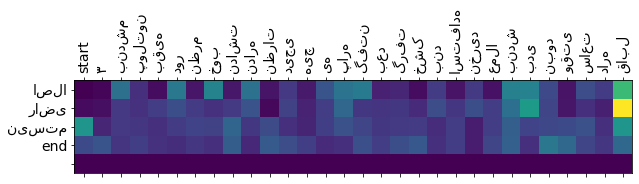

In [75]:
translate('۳ بندشم پولتون بقیه دور نظرم خوب نداشت نداره نظرات دیجی هیچ یه پاره گفتن بعد گرفت خشک بند استفاده نخرید عملا بندش بدی نبود وقتی ساعت داره قابل سنسوراش حتی پاره جا ظاهر خوبی توجه ماه دیگه بزرگی یدکی ولی میریزید میشه')

Input: start فاقد بازی اسباب کاملا استفاده ارزش بلا end
Predicted translation: اسباب بازی کاملا بلا استفاده end 


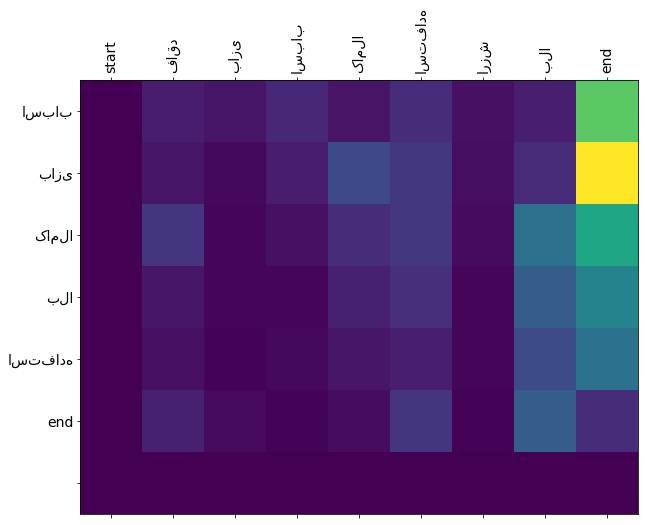

In [0]:
translate('فاقد بازی اسباب کاملا استفاده ارزش بلا')

Input: start دماش عالییه دیجیکالاییم البت چسپندگی استحکام یسری ۶ماه اسپلیتر عسلشه بازدهه قیمش چنگالش جبران همراهانش نظرمن مدادی اقدام جیغهه یورو end
Predicted translation: درکل سرشعله وهم سرشعله وهم سرشعله end 


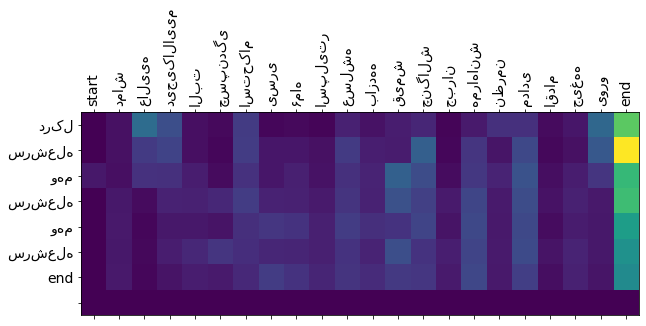

In [0]:
translate('دماش عالییه دیجیکالاییم البت چسپندگی استحکام یسری ۶ماه اسپلیتر عسلشه بازدهه قیمش چنگالش جبران همراهانش نظرمن مدادی اقدام جیغهه یورو')

Input: start ضعیفیه خریدکالا۲۴ هیجان انکیز تاحالا ومناسب پشیمانم پک موزد معرکه ۹۴۵۰ تواین حجمش داشتنیه ارزشمندی چتری سولفاتش سامسونگش قشنگی ششم end
Predicted translation: دستبند رو خریدم عین طلا نسکافه ای کاش ابعادشو مینوشت دوس داشتم end 


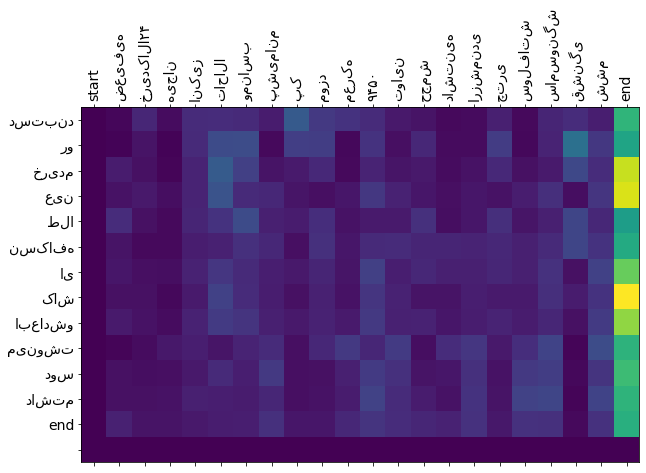

In [0]:
translate('ضعیفیه خریدکالا۲۴ هیجان انکیز تاحالا ومناسب پشیمانم پک موزد معرکه ۹۴۵۰ تواین حجمش داشتنیه ارزشمندی چتری سولفاتش سامسونگش قشنگی ششم')

Input: start پولمو انصافن مان افتابی افتابی موافق افتابی باحالیه موافق اسپلیتر خوشکل خوشکل موافق آشپزی جی۷ چنینی بنزیننش افتابی چنگالش چنگالش وتو اسپلیتر انصافن افتابی بادوام استاندار مخصوصن ساویج مخصوصن وتو خوشکل تفلون end
Predicted translation: المینیوم تقریبا خوشکل تر چیپسای سیب زمینی دربیارین ضربه میزنید واست end 


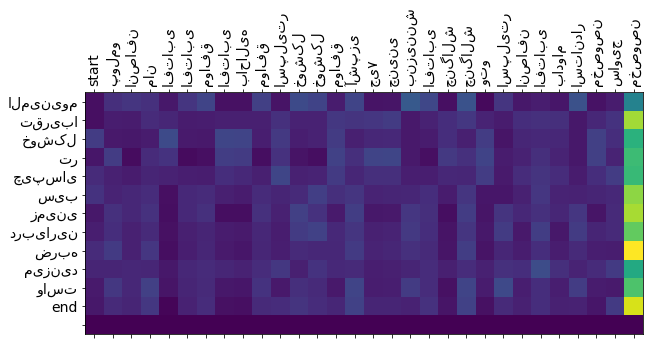

In [0]:
translate('پولمو انصافن مان افتابی افتابی موافق افتابی باحالیه موافق اسپلیتر خوشکل خوشکل موافق آشپزی جی۷ چنینی بنزیننش افتابی چنگالش چنگالش وتو اسپلیتر انصافن افتابی بادوام استاندار مخصوصن ساویج مخصوصن وتو خوشکل تفلون')

Input: start چنگالش بلنیچر احتیاجتون اسپلیتر افتضاحی معذرت بابات قلبلمه آمپرش بدردنمیخوره سامسونگش معضل یکسالهاین کارمون خکین درهر شارژکردم تمومه کر شارژکردم ۶ماه وسیعی ۵روز ۵روز بیصدا جهات هرکسی اوکی همیار پیشنهادمیکنم افتابی end
Predicted translation: حریقش منی ک براحتی بافشار کم دعتونو ندا راضی کنندس end 


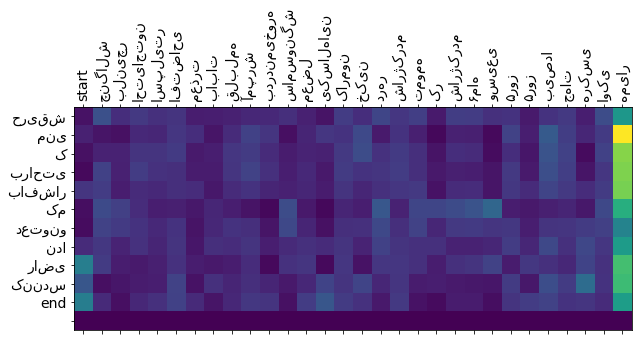

In [0]:
translate('چنگالش بلنیچر احتیاجتون اسپلیتر افتضاحی معذرت بابات قلبلمه آمپرش بدردنمیخوره سامسونگش معضل یکسالهاین کارمون خکین درهر شارژکردم تمومه کر شارژکردم ۶ماه وسیعی ۵روز ۵روز بیصدا جهات هرکسی اوکی همیار پیشنهادمیکنم افتابی')

Input: start جا مناسبه یه تمام تو چیز خوبه استفاده داره دسکتاپ سال کیفیت نسبت هیچ فقط سنگینی دیگه فیلم توجه ها اونم میکنه ساخت ازش خریدم یه نیست نداشته عجییبی دسکتاپ اذیت رو زیاده نزدیک ازش آداپتور ساله اینکه انتقال جایی میکنم کرده هارد ایرادی عنوان رو هارد مقدار مقدار عکس هارد خوبی هست مشکل سخت نمونه وزن سرعت آپ های استفاده اطلاعاتش ها نداشتم بک هارد یه اطلاعات end
Predicted translation: هارد خوبی داره end 


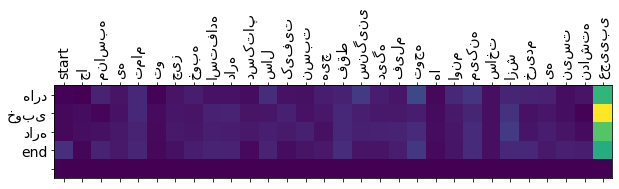

In [0]:
translate('جا مناسبه یه تمام تو چیز خوبه استفاده داره دسکتاپ سال کیفیت نسبت هیچ فقط سنگینی دیگه فیلم توجه ها اونم میکنه ساخت ازش خریدم یه نیست نداشته عجییبی دسکتاپ اذیت رو زیاده نزدیک ازش آداپتور ساله اینکه انتقال جایی میکنم کرده هارد ایرادی عنوان رو هارد مقدار مقدار عکس هارد خوبی هست مشکل سخت نمونه وزن سرعت آپ های استفاده اطلاعاتش ها نداشتم بک هارد یه اطلاعات')

Input: start من بدم خیلی افتضاح موبایل بود داغون سریع بد شکسته نخر end
Predicted translation: افتضاح سریع میسوزن خیلی بد نبود سریع شکست end 


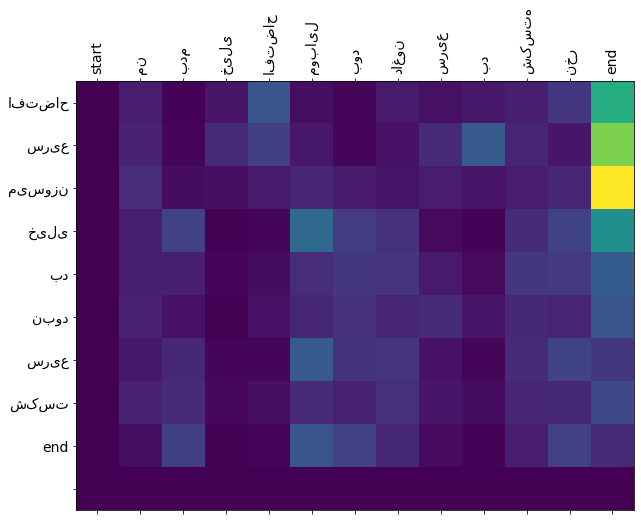

In [0]:
translate('من بدم خیلی افتضاح موبایل بود داغون سریع بد شکسته نخر')